In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import astropy as asp
import pickle
import tqdm

In [2]:
COLUMNS = [
    'deblend_nChild',
    'id', 
    'coord_ra', 
    'coord_dec', 
    'base_SdssCentroid_x',
    'base_SdssCentroid_y',
    'base_SdssCentroid_flag',
    'base_SdssShape_xx', 
    'base_SdssShape_yy', 
    'base_SdssShape_xy',
    'base_SdssShape_psf_xx', 
    'base_SdssShape_psf_yy',
    'base_SdssShape_psf_xy',
    'base_SdssShape_flag',
    'modelfit_DoubleShapeletPsfApprox_flag',
    'base_PsfFlux_instFlux',
    'base_PsfFlux_instFluxErr',
    'base_PsfFlux_flag',
    'modelfit_CModel_instFlux', 
    'modelfit_CModel_instFluxErr',
    'modelfit_CModel_flag',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFlux',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr',
    'ext_gaap_GaapFlux_flag',
    'base_CircularApertureFlux_4_5_instFlux',
    'base_CircularApertureFlux_4_5_instFluxErr',
    'base_CircularApertureFlux_9_0_instFlux',
    'base_CircularApertureFlux_9_0_instFluxErr',
    'base_CircularApertureFlux_25_0_instFlux',
    'base_CircularApertureFlux_25_0_instFluxErr',
    'base_ClassificationSizeExtendedness_flag',
]

In [3]:
# bands = 'ugrizy'
# full_cats = None
# base = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/'
# i = 0
# for f in os.listdir(base):
#     print(i)
#     file = base + f
#     try:
#         with open(f'{file}/ECDFS_sim_meas_single.pkl', 'rb') as f:
#             cat = pickle.load(f)
#         if full_cats == None:
#             for b in bands:
#                 cat[b]['obs_ind'] = i
                
#             full_cats = cat
#         else:
#             for b in bands:
#                 cat[b]['obs_ind'] = i
#                 full_cats[b] = asp.table.vstack([full_cats[b], cat[b]])
#         i += 1
#     except:
#         pass


bands = 'ugrizy'
base = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_v4/'
cats_by_band = {b: [] for b in bands}
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_meas_single.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
            pass
        for b in bands:
            temp = cat[b][COLUMNS]
            temp['obs_ind'] = i
            temp = temp[(temp['deblend_nChild'] == 0) &
              (temp['base_SdssShape_flag'] == False) &
              (temp['modelfit_CModel_instFlux'] >= 0) &
              (temp['modelfit_CModel_flag'] == False) &
              (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
              (temp['base_SdssCentroid_flag'] == False) &
              (temp['ext_gaap_GaapFlux_flag'] == False) &
              (temp['base_ClassificationSizeExtendedness_flag'] == False)]
            temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
            cats_by_band[b].append(temp)
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
full_cats = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}


0
100
200
300
400
500
600
700
800
900


In [4]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/full_cat_v4.pkl', "wb") as f:
    pickle.dump(full_cats, f)

In [5]:
print(max(full_cats['i']['obs_ind']))

999


In [6]:
bands = 'ugrizy'
base = '/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_v4/'
cats_by_band = {b: [] for b in bands}
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_truth.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
        for b in bands:
            cats_by_band[b].append(cat[b])
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
true_cats = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}


0
100
200
300
400
500
600
700
800
900


In [7]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs/true_cat_v4.pkl', "wb") as f:
    pickle.dump(true_cats, f)

In [ ]:
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/full_cat.pkl', "rb") as f:
#     full_cats = pickle.load(f)

(13.0, 28.0)

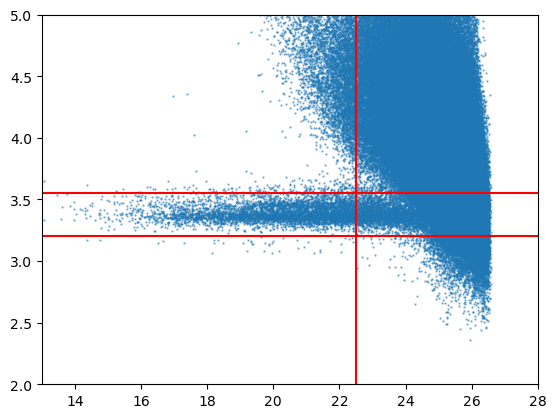

In [34]:
b = 'g'
temp = full_cats[b]
temp = temp[(temp['deblend_nChild'] == 0) &
    (temp['base_SdssShape_flag'] == False) &
    (temp['modelfit_CModel_instFlux'] >= 0) &
    (temp['modelfit_CModel_flag'] == False) &
    (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
    (temp['base_SdssCentroid_flag'] == False) &
    (temp['ext_gaap_GaapFlux_flag'] == False) &
    (temp['base_ClassificationSizeExtendedness_flag'] == False)]
temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]

mag = -2.5 * np.log10(temp['modelfit_CModel_instFlux']) + 31.4
size = np.sqrt(temp['base_SdssShape_xx'] + temp['base_SdssShape_yy'])
# psf = np.sqrt(temp['base_SdssShape_psf_xx'] + temp['base_SdssShape_psf_yy'])

plt.scatter(mag, size, s=0.5, alpha=0.5)
# plt.scatter(mag, psf, s=0.3, alpha=0.3)
# plt.axhline(3.35, c='r')
# plt.axhline(2.8, c='r')
# plt.axvline(21.5, c='r')
# plt.ylim(2,5)
# plt.xlim(13,28)
plt.axhline(3.55, c='r')
plt.axhline(3.2, c='r')
plt.axvline(22.5, c='r')
plt.ylim(2,5)
plt.xlim(13,28)

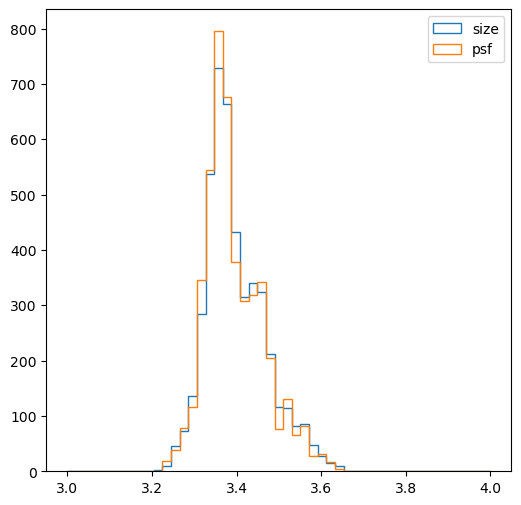

In [29]:
stars = temp[(mag < 22.0) & (size < 3.65) & (size > 3.2)]

size_bins = np.linspace(3,4,50)
star_size = np.sqrt(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
star_psf = np.sqrt(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(star_size, size_bins, histtype="step", label="size")
plt.hist(star_psf, size_bins, histtype="step", label="psf")
plt.legend()
plt.show()

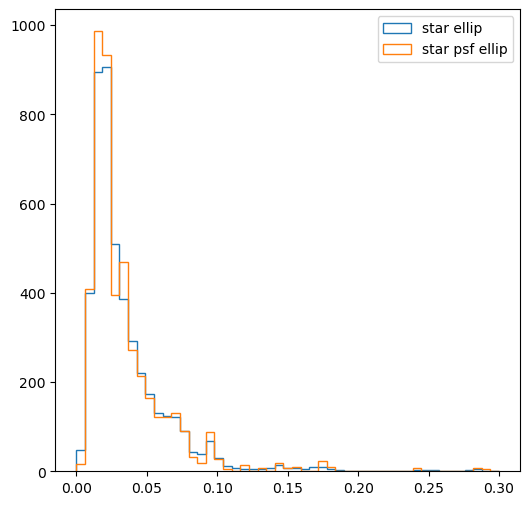

In [30]:
e1 = (stars['base_SdssShape_psf_xx'] - stars['base_SdssShape_psf_yy'])/(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
e2 = 2*(stars['base_SdssShape_psf_xy'])/(stars['base_SdssShape_psf_xx'] + stars['base_SdssShape_psf_yy'])
ellip = np.sqrt((e1)**2 + (e2)**2)

se1 = (stars['base_SdssShape_xx'] - stars['base_SdssShape_yy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
se2 = 2*(stars['base_SdssShape_xy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
sellip = np.sqrt((se1)**2 + (se2)**2)

ellip_bins = np.linspace(0,0.3,50)
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(sellip, ellip_bins, histtype="step", label="star ellip")
plt.hist(ellip, ellip_bins, histtype="step", label="star psf ellip")
plt.legend()
plt.show()

# approx zero, consistent with kolmogorov profile

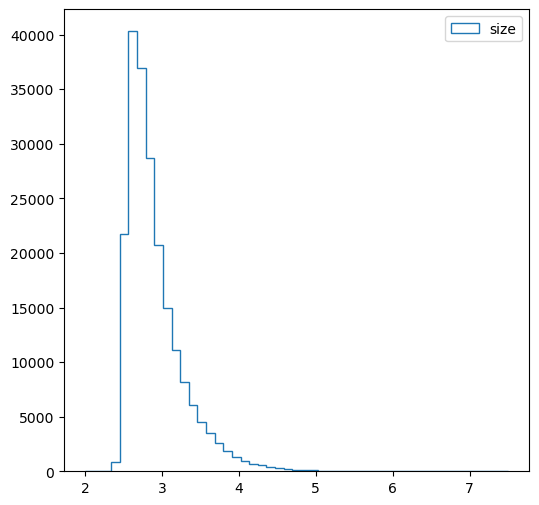

In [35]:
gals = temp[(size >= 3.55)]
size_bins = np.linspace(2,7.5,50)
# gal_size = np.sqrt(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
gal_size = (gals['base_SdssShape_xx']*gals['base_SdssShape_yy'] - gals['base_SdssShape_xy']**2)**0.25

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(gal_size, size_bins, histtype="step", label="size")
plt.legend()
plt.show()

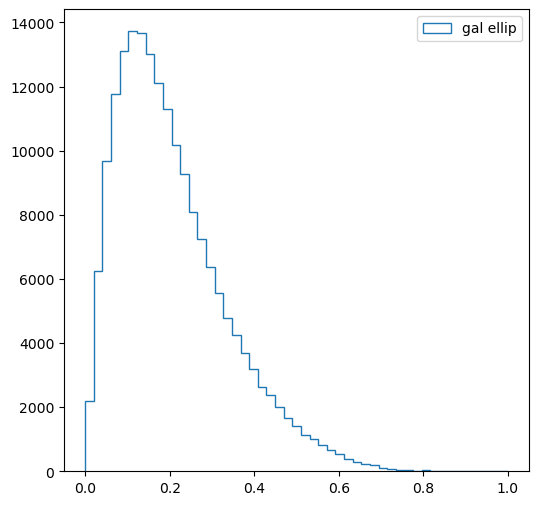

In [32]:
e1 = (gals['base_SdssShape_xx'] - gals['base_SdssShape_yy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
e2 = 2*(gals['base_SdssShape_xy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
ellip = np.sqrt((e1)**2 + (e2)**2)

ellip_bins = np.linspace(0,1,50)
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(ellip, ellip_bins, histtype="step", label="gal ellip")
plt.legend()
plt.show()

In [19]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/dp1_mags_{b}_full.pickle', 'rb') as f:
    dp1 = pickle.load(f)

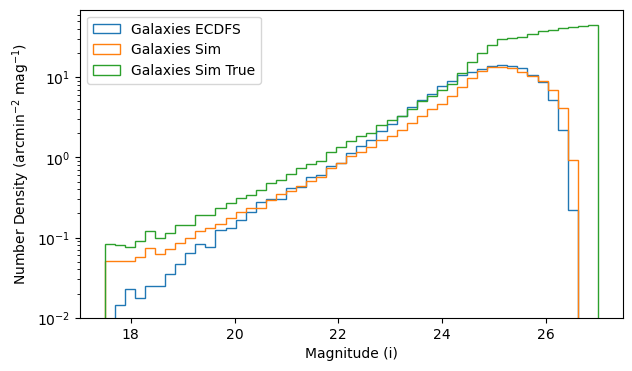

In [ ]:
temp_cut = temp[size >= 3.25]
count = max(full_cats[b]['obs_ind']) + 1
area = count* (900 * 0.2/60) **2

mag_bins = np.linspace(17.5, 27, 50)
bin_size = mag_bins[1] - mag_bins[0]
fig, ax = plt.subplots(1,figsize=(7,4))

cut_sim_mag = -2.5 * np.log10(temp_cut['modelfit_CModel_instFlux']) + 31.4
sim_weight = np.full_like(cut_sim_mag, 1/(area*bin_size))
true_mag = -2.5* np.log10(true_cats[b]['flux']) + 31.4
true_weight = np.full_like(true_mag, 1/(area*bin_size))

ghist_dp1, bins, _ =ax.hist(dp1['mag'], dp1['bins'], weights=dp1['weights'], histtype="step",label="Galaxies ECDFS")
ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins, weights=sim_weight, histtype="step",label='Galaxies Sim')
ghist_sim, bins, _ =ax.hist(true_mag, mag_bins, weights=true_weight, histtype="step",label='Galaxies Sim True')
ax.set_xlabel("Magnitude (i)")
ax.set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
ax.set_yscale('log')
ax.legend()
ax.set_ylim(10e-3)
plt.show()

In [ ]:
## bootstrap error
count = max(full_cats[b]['obs_ind'])
area = count* (900 * 0.2/60) **2
outs = {'u':[], 'g':[],'r':[],'i':[],'z':[],'y':[]}
bins = np.linspace(17.5, 27, 50)
bin_size = bins[1] - bins[0]
bands = 'ugrizy'
# for n in tqdm.tqdm(range(1000)):
#     for b in bands:
#         dset = full_cats[b]
#         l = len(dset)
#         choice = np.random.choice(np.arange(l),size=l, replace=True)
#         data = dset['mag'][choice]
#         digits = np.digitize(data, bins, right=True)
#         lens = []
#         for i in range(len(bins) - 1):
#             bl = sum(digits==i) / 1/(area * bin_size)
#             lens.append(bl)
#         outs[b].append(lens)

norm = area * bin_size
nbins = len(bins) - 1
nboot = 1000
outs = {b: np.empty((nboot, nbins)) for b in bands}
for b in bands:
    temp = full_cats[b]
    temp = temp[(temp['deblend_nChild'] == 0) &
        (temp['base_SdssShape_flag'] == False) &
        (temp['modelfit_CModel_instFlux'] >= 0) &
        (temp['modelfit_CModel_flag'] == False) &
        (temp['ext_gaap_GaapFlux_1_15x_Optimal_instFlux'] >= 0) &
        (temp['base_SdssCentroid_flag'] == False) &
        (temp['ext_gaap_GaapFlux_flag'] == False) &
        (temp['base_ClassificationSizeExtendedness_flag'] == False)]
    temp = temp[(temp['base_PsfFlux_instFlux']/temp['base_PsfFlux_instFluxErr'] >= 10)]
    mags = temp['mag']
    l = len(mags)
    for n in tqdm.tqdm(range(nboot), desc=f"{b} band"):
        data = mags[np.random.randint(0, l, size=l)]
        hist, _ = np.histogram(data, bins=bins)
        outs[b][n] = hist / norm


y band: 100%|██████████| 1000/1000 [00:02<00:00, 437.77it/s]


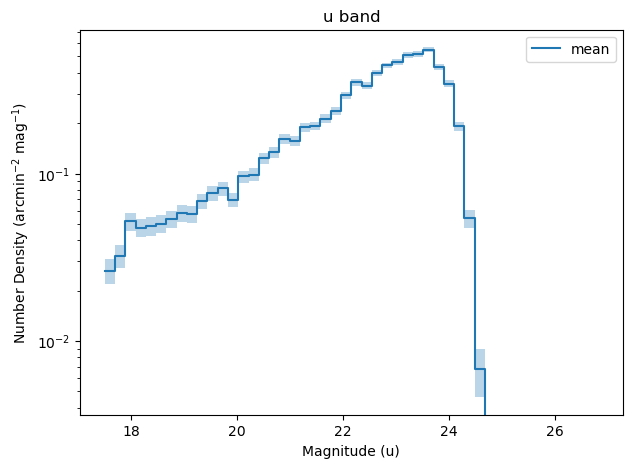

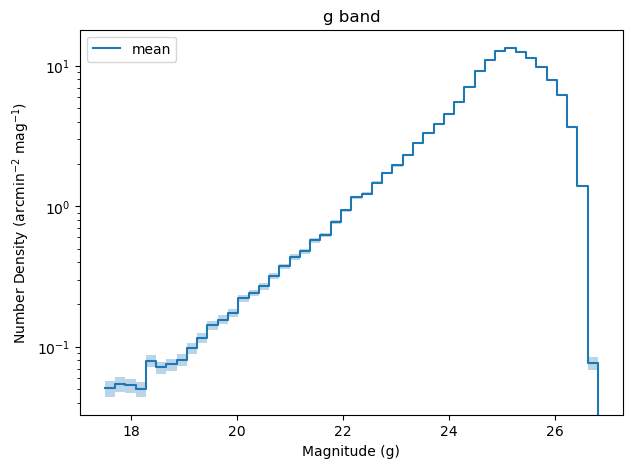

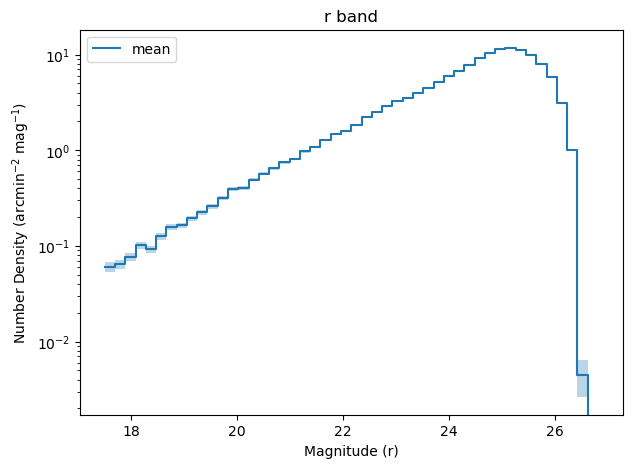

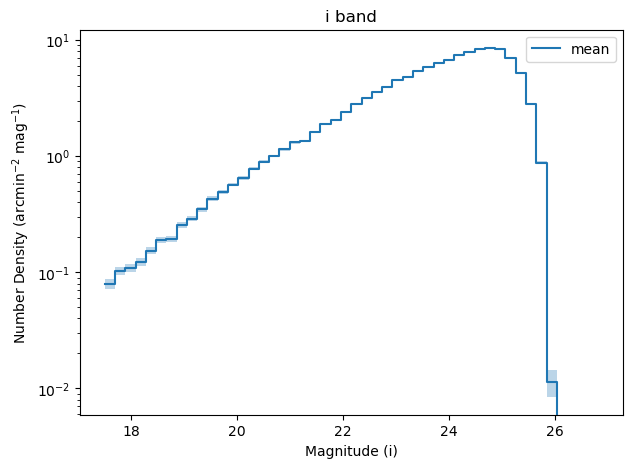

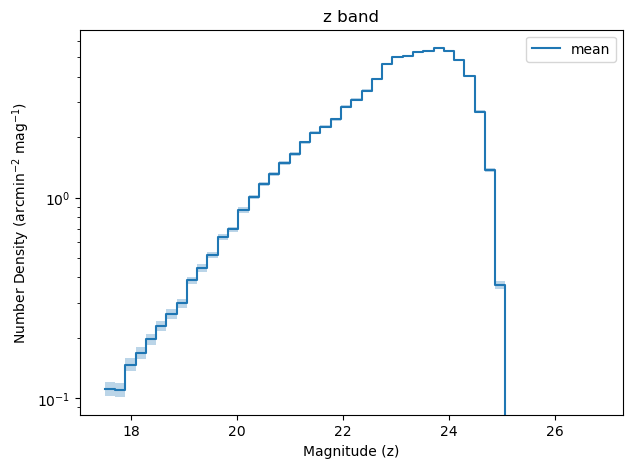

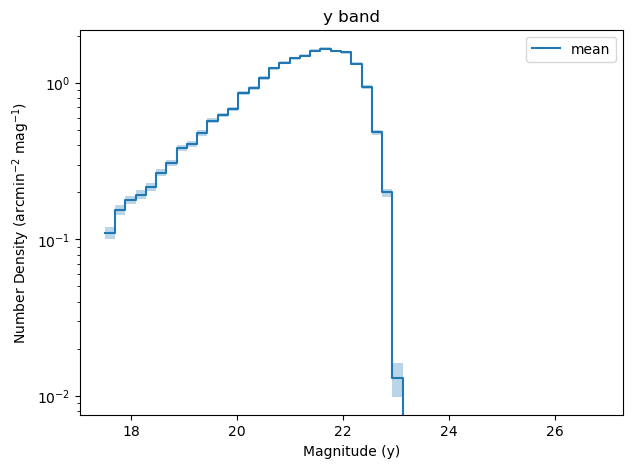

In [59]:
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(bands)):
    fig, ax = plt.subplots(figsize=(7,5))
    b = bands[i]
    outs_arr = np.asarray(outs[b]) 
    means = outs_arr.mean(axis=0)
    stds  = outs_arr.std(axis=0)
    # ax.plot(bin_centers, means, label=b)
    # ax.fill_between(bin_centers, means - stds, means + stds, alpha=0.2)
    ax.step(bins[:-1], means, where='post', label='mean')
    ax.fill_between(
        bins[:-1],
        means - stds,
        means + stds,
        step='post',
        alpha=0.3
    )
    ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
    ax.set_xlabel(f"Magnitude ({b})")
    ax.set_yscale('log')
    ax.set_title(f'{b} band')
    ax.legend()

plt.show()


/tmp/ipykernel_2603344/2250411086.py:33: RuntimeWarning: invalid value encountered in divide
  frac_err = stds / means


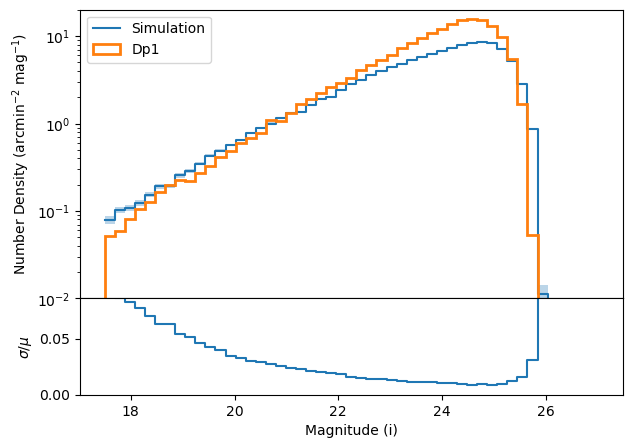

In [58]:
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_edges = bins

outs_arr = np.asarray(outs['i'])   # (n_boot, n_bins)
means = outs_arr.mean(axis=0)
stds  = outs_arr.std(axis=0)

fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

ax = fig.add_subplot(gs[0])
ax_err = fig.add_subplot(gs[1], sharex=ax)

# --- main histogram ---
ax.step(bin_edges[:-1], means, where='post', label='Simulation')
ax.fill_between(
    bin_edges[:-1],
    np.clip(means - stds, 1e-20, None),
    means + stds,
    step='post',
    alpha=0.3
)
ax.set_yscale('log')
ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
ax.set_ylim(10**-2, 20)

dp1_m = dp1['mag']
dp1_w = dp1['weights']
dp1_b = dp1['bins']
ax.hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")

# --- error panel ---
frac_err = stds / means

ax_err.step(
    bin_edges[:-1],
    frac_err,
    where='post'
)
ax_err.set_ylabel(r'$\sigma / \mu$')
ax_err.set_ylim(0, np.nanpercentile(frac_err, 95))

ax_err.set_xlabel('Magnitude (i)')

# hide x labels on main plot
plt.setp(ax.get_xticklabels(), visible=False)
ax.legend()
plt.show()

/tmp/ipykernel_2603344/1431951203.py:36: RuntimeWarning: invalid value encountered in divide
  frac_err = stds / means


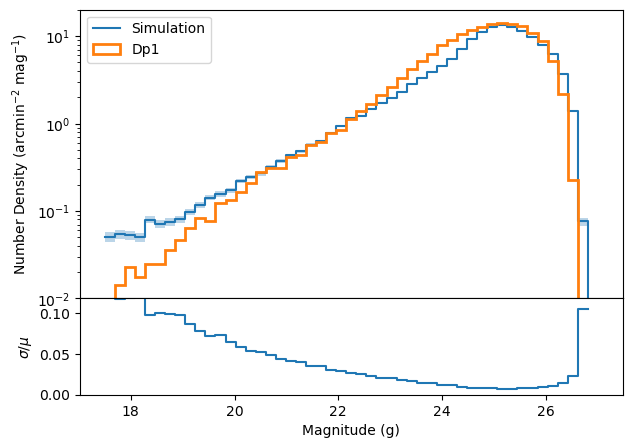

In [60]:
with open('/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/dp1_mags_g_full.pickle', 'rb') as f:
    dp1 = pickle.load(f)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_edges = bins

outs_arr = np.asarray(outs['g'])   # (n_boot, n_bins)
means = outs_arr.mean(axis=0)
stds  = outs_arr.std(axis=0)

fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

ax = fig.add_subplot(gs[0])
ax_err = fig.add_subplot(gs[1], sharex=ax)

# --- main histogram ---
ax.step(bin_edges[:-1], means, where='post', label='Simulation')
ax.fill_between(
    bin_edges[:-1],
    np.clip(means - stds, 1e-20, None),
    means + stds,
    step='post',
    alpha=0.3
)
ax.set_yscale('log')
ax.set_ylabel('Number Density (arcmin$^{-2}$ mag$^{-1}$)')
ax.set_ylim(10**-2, 20)

dp1_m = dp1['mag']
dp1_w = dp1['weights']
dp1_b = dp1['bins']
ax.hist(dp1_m, dp1_b,weights=dp1_w,histtype="step",linewidth=2, label="Dp1")

# --- error panel ---
frac_err = stds / means

ax_err.step(
    bin_edges[:-1],
    frac_err,
    where='post'
)
ax_err.set_ylabel(r'$\sigma / \mu$')
ax_err.set_ylim(0, np.nanpercentile(frac_err, 95))

ax_err.set_xlabel('Magnitude (g)')

# hide x labels on main plot
plt.setp(ax.get_xticklabels(), visible=False)
ax.legend()
plt.show()

In [61]:
area = 758* (900 * 0.2/3600) **2
print(area)

1.8950000000000005
